# Mini Projet Introduction au Deep Learning (Perceptron)
# Alexis Araujo

## Première Partie

In [1]:
#Importation des librairies
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## Création du dataSet

In [2]:
# Définir le nombre d'échantillons (m) et le nombre de caractéristiques (n)
m = 1000  # Le nombre d'étudiants souhaité
n = 2    # Nombre de caractéristiques (par exemple, notes en mathématiques et en français)

In [3]:
# Générer des données aléatoires pour les caractéristiques (notes)
X = np.random.randint(0, 21, size=(m, n))  # Génère m lignes avec n colonnes de notes aléatoires entre 0 et 20

In [4]:
# Définir les poids des caractéristiques (pondération)
# Par exemple, pour l'informatique, on peut attribuer un poids plus élevé aux matières scientifiques
weights = np.array([3, 2])  # Poids des caractéristiques (par exemple, [poids_math, poids_francais])

In [5]:
# Calculer la moyenne pondérée pour chaque étudiant
weighted_grades = np.dot(X, weights)
mean_weighted_grades = weighted_grades / np.sum(weights)  # Normalisation des moyennes pondérées

In [6]:
# Définir les résultats d'admission en fonction des moyennes pondérées
# Ici, les étudiants avec une moyenne pondérée supérieure ou égale à 10 sont admis (y=1), sinon non admis (y=0)
y = np.where(mean_weighted_grades >= 10, 1, 0)  # Création des labels d'admission

In [7]:
# Affichage des premières lignes du dataset et des résultats d'admission
print("Dataset X (caractéristiques des étudiants) :\n", X)
print("\nRésultats d'admission y :\n", y)

Dataset X (caractéristiques des étudiants) :
 [[13  2]
 [15  1]
 [12  9]
 ...
 [ 3  8]
 [ 7  1]
 [18  1]]

Résultats d'admission y :
 [0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0
 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1
 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0
 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1
 1 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1
 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0 1 1 1 1 0 0 1 1 0
 1 0 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1
 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0
 0 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 1 1
 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 

On peut voir ici un dataset X avec 2 colones et m lignes.
La 1er colonne sont les résultats en math de chaque étudiant
La 2ème colonne sont les résultats en francais de chaque étudiant

Chaque ligne représente 1 étudiant


Pour le tableau y dit si les étudiants ont été admis ou non
Chaque colonne correspond à un étudiant
0 il n'a pas été admis
1 il a été admis

In [8]:
y = y.reshape(y.shape[0], 1)
print(X.shape,y.shape)

(1000, 2) (1000, 1)


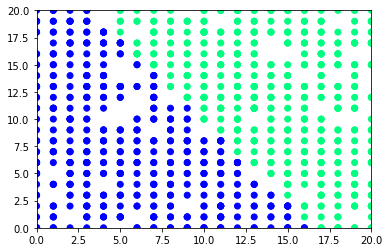

In [9]:
# Affichage de la dispersion de vos données
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')
plt.xlim(0, 20)  # Limiter l'axe x de 0 à 20
plt.ylim(0, 20)  # Limiter l'axe y de 0 à 20
plt.show()

In [10]:
def initialisation(X):
    W=np.random.randn(X.shape[1],1)
    b=np.random.randn(1)
    return (W, b)

In [11]:
def model(X,W,b):
    Z=X.dot(W)+b
    A=1/(1+np.exp(-Z))
    return A

In [12]:
#A=model(X,W,b)
#A.shape

In [13]:
def logLoss(A,y):
    return 1/len(y)*np.sum(-y*np.log(A)-(1-y)*np.log(1-A))

In [14]:
#logLoss(A,y)

In [15]:
def gradients (A,X,y):
    dW=1/len(y)*np.dot(X.T,A-y)
    db=1/len(y)*np.sum(A-y)
    return (dW,db)

In [16]:
#dW, db = gradients(A,X,y)
#db

In [17]:
def update(dW,db, W, b, learning_rate):
    W=W-learning_rate*dW
    b=b-learning_rate*db
    return (W,b)

In [18]:
def prediction(X,W,b):
    A=model(X,W,b)
    print(A)
    return A>=0.5

In [19]:
def perceptron(X, y, learning_rate=0.05, n_iter=6000):
    W,b=initialisation(X)
    cout=[]
    for i in range(n_iter):
        A=model(X,W,b)
        cout.append(logLoss(A,y))
        dW,db=gradients(A,X,y)
        W,b= update(dW,db,W,b,learning_rate)
    y_pred=prediction(X,W,b)
    print(accuracy_score(y, y_pred))
    plt.plot(cout)
    plt.show()
    return (W,b)

[[3.05394769e-01]
 [5.07417471e-01]
 [7.42606786e-01]
 [8.44785072e-02]
 [9.56161926e-01]
 [1.72720453e-01]
 [9.67781529e-01]
 [2.90799867e-01]
 [9.65466043e-01]
 [8.58670545e-01]
 [9.06012910e-01]
 [6.08887184e-02]
 [9.99619209e-01]
 [7.68724749e-01]
 [9.91998778e-01]
 [9.78692417e-01]
 [2.83658795e-01]
 [9.67718031e-01]
 [3.92602651e-02]
 [4.05973300e-02]
 [3.54283685e-02]
 [9.97026789e-01]
 [3.68983853e-01]
 [1.78059287e-01]
 [9.14712098e-01]
 [9.01997758e-02]
 [4.54710805e-01]
 [1.16286824e-01]
 [4.64840942e-02]
 [8.71128332e-01]
 [1.05764578e-01]
 [3.85370485e-01]
 [9.99702894e-01]
 [8.31032831e-01]
 [7.14634231e-01]
 [9.71914901e-01]
 [1.31875642e-01]
 [4.72056498e-01]
 [9.86463798e-01]
 [3.60899867e-01]
 [3.16082449e-03]
 [4.19396369e-01]
 [9.95765351e-01]
 [3.15907653e-04]
 [4.45573700e-01]
 [9.99920059e-01]
 [4.80548715e-02]
 [9.31035411e-02]
 [4.05973300e-02]
 [9.86463798e-01]
 [9.94177404e-01]
 [2.03830814e-02]
 [8.73778490e-02]
 [9.76350364e-01]
 [7.35883148e-01]
 [7.074677

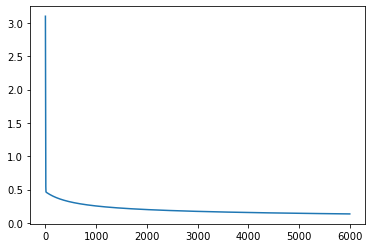

In [20]:
W, b = perceptron(X, y)

In [21]:
# test de l'élève voir s'il est admis ou pas ( note francais, note math)
nouvellePlante=np.array([2,1])

x0=np.linspace(0,20,100)
#x1 = (-b - W[0] * x0) / W[1]

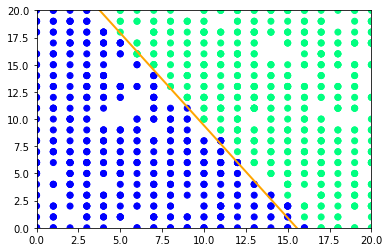

In [22]:
# Génération des valeurs x0 pour tracer la droite de décision
x0 = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1, 100)

# Calcul de x1 en utilisant les poids et le biais pour tracer la frontière de décision
x1 = (-b - W[0] * x0) / W[1]

# Affichage du dataset et de la frontière de décision
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')
plt.plot(x0, x1, c='orange', lw=2)
plt.xlim(0, 20)  # Limiter l'axe x de 0 à 20
plt.ylim(0, 20)  # Limiter l'axe y de 0 à 20
plt.show()

In [23]:
# le pourcentage de chance que l'élève soit admis
# Voir si l'élève est admis
prediction(nouvellePlante, W,b)

[0.00040489]


array([False])